# DA-AG-018 Assignment: Anomaly Detection & Time Series


---


## Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

**Answer :**

**Definition:** Anomaly detection (or outlier detection) is the process of identifying observations, events, or data points that differ significantly from the majority of the data. Anomalies can indicate important, actionable events like fraud, system faults, intrusions, or measurement errors.

**Why it matters:**  
- Detect fraud (banking/credit card).  
- Detect failures (machines, sensors).  
- Monitor security (intrusion detection).  
- Improve data quality by spotting erroneous records.

**Types and concrete examples:**

1. **Point (global) anomaly** — a single instance that is abnormal compared to the rest of the dataset.  
   - *Example:* In a dataset of daily sales where values usually range 100–500, a single entry 50,000 is a point anomaly (possible data entry error or fraud).

2. **Contextual (conditional) anomaly** — an observation that is anomalous in a specific context (time, location, season) but may be normal in another context. Contextual anomalies are common in time series and spatio-temporal data.  
   - *Example:* Temperature = 30°C is normal in summer but anomalous in winter for the same city. In time-series, the same numeric value can be normal or abnormal depending on season or time-of-day.

3. **Collective anomaly** — a sequence or group of related observations that together are anomalous, even though individual points may appear normal. Often indicates an unusual pattern or event.  
   - *Example:* A sustained small increase in vibration readings on a machine over many hours (each reading within normal range) may collectively indicate an emerging fault.

**Common approaches (short):** statistical tests (z-score, IQR), distance-based (k-NN), density-based (LOF, DBSCAN), ensemble/tree (Isolation Forest), and model-based (autoencoders, LSTM).

**Evaluation:** use precision/recall/F1 and domain-specific cost metrics since anomalies are rare and class-imbalanced.



## Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

**Answer :**

### Isolation Forest (IF)
- **Approach:** Builds many random binary trees by randomly selecting features and split values. Anomalies tend to be isolated earlier (shorter path lengths) because they are few and different.
- **Strengths:** Fast, scales to large datasets, works with high-dimensional data, little preprocessing needed.
- **Weaknesses:** Assumes anomalies are more “isolatable”; may miss anomalies that are not far from normal points in feature space. Requires setting `contamination` (fraction of expected outliers).
- **Use cases:** Large tabular datasets (fraud detection, intrusion detection), quick scanning for outliers.

### DBSCAN (Density-Based Spatial Clustering)
- **Approach:** Groups points into clusters where points within `eps` distance of each other form a dense region; points not in any cluster are flagged as noise/outliers.
- **Strengths:** Detects clusters of arbitrary shape, directly identifies noise, interpretable spatial behaviour.
- **Weaknesses:** Choice of `eps` and `min_samples` critical; struggles with varying density and high-dimensional spaces.
- **Use cases:** Geospatial anomaly detection, point-cloud cleaning, cluster-based noise detection.

### Local Outlier Factor (LOF)
- **Approach:** Compares the local density of a point to the densities of its neighbors. A point with significantly lower local density than its neighbors gets a high LOF score (anomalous).
- **Strengths:** Good at detecting local anomalies in datasets with varying density; unsupervised and interpretable locally.
- **Weaknesses:** Sensitive to `k` (number of neighbors); computationally heavier for large datasets; not ideal for very high dimensions without dimensionality reduction.
- **Use cases:** Sensor networks with varying operating regimes, anomaly detection in mixed-density clusters, local fraud detection.

**Quick rule-of-thumb:** Use Isolation Forest for large, high-dimensional tabular data; LOF when local density differences matter; DBSCAN when you expect cluster structure and want to treat non-cluster points as outliers.



## Question 3: What are the key components of a Time Series? Explain each with one example.

**Answer :**

Time series data can be decomposed into these main components:

1. **Trend:** Long-term increase or decrease in the series.  
   - *Example:* A steady increase in monthly active users for an app over years.

2. **Seasonality:** Regular, repeating patterns with a fixed and known period (daily, weekly, monthly, yearly).  
   - *Example:* Retail sales spike every December (annual seasonality).

3. **Cyclic (Business cycles):** Long-term oscillations that do not have a fixed period and are driven by economic or other irregular cycles.  
   - *Example:* Economic expansions and recessions affecting industrial production over several years.

4. **Irregular/Noise:** Random fluctuations with no predictable pattern (residual after removing trend/seasonality).  
   - *Example:* Sudden one-off drop in sales due to a short-term outage.

**Why decomposition helps:** Separating components allows better modeling (e.g., model trend with regression, seasonality with seasonal models like SARIMA, and residuals with stochastic models).



## Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

**Answer :**

**Definition:** A time series is *stationary* when its statistical properties — mean, variance, and autocorrelation structure — remain constant over time. Stationarity is important because many time-series models (AR, MA, ARIMA) assume stationarity to ensure reliable parameter estimation and forecasting.

**How to test for stationarity:**  
- **Visual inspection:** Plot the series and look for changing mean/variance.  
- **Summary statistics:** Compare mean/variance across different windows.  
- **Statistical tests:**  
  - *Augmented Dickey-Fuller (ADF) test:* Null hypothesis = series has a unit root (non-stationary). A low p-value (e.g., < 0.05) rejects non-stationarity.  
  - *KPSS test:* Null hypothesis = series is stationary. Helps confirm ADF. Use both ADF and KPSS for robust conclusion.

**Common transformations to achieve stationarity:**  
1. **Differencing:** Subtract the previous value (first difference) or seasonal difference (lag = season length). Often the primary method. Example: y_t' = y_t - y_{t-1}.  
2. **Log transform / Box-Cox:** Stabilize variance when variability grows with level. Example: apply log before differencing.  
3. **Detrending:** Remove deterministic trend via regression or moving average smoothing.  
4. **Seasonal decomposition:** Remove seasonal component (additive or multiplicative) then model residuals.

**Workflow example:**  
1. Plot series → check ADF/KPSS → if non-stationary, try log (if variance changes) → apply differencing → re-test → if seasonal, apply seasonal differencing (lag 12 for monthly) → once stationary, proceed to model building.



## Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

**Answer :**

**AR (AutoRegressive) - AR(p):**  
Model where current value depends on a linear combination of previous p values plus noise.  
Equation: \( y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t \)  
*Use-case:* Short memory time series where past values directly influence current value.

**MA (Moving Average) - MA(q):**  
Model where current value depends on a linear combination of past q error terms.  
Equation: \( y_t = \mu + \epsilon_t + 	heta_1 \epsilon_{t-1} + \dots + 	heta_q \epsilon_{t-q} \)  
*Use-case:* Series where shocks/errors have short-lived effects.

**ARIMA (p, d, q):**  
Combines AR and MA with differencing (d) to handle non-stationarity.  
- *p:* AR order, *d:* degree of differencing, *q:* MA order.  
*Use-case:* Non-seasonal forecasting after making the series stationary via differencing.

**SARIMA (P, D, Q, s):**  
Seasonal extension of ARIMA adding seasonal AR (P), seasonal differencing (D), seasonal MA (Q) with period s.  
Equation (conceptual): ARIMA(p,d,q) + Seasonal ARIMA(P,D,Q)_s  
*Use-case:* Time series with clear seasonal patterns (e.g., monthly data with annual seasonality s=12).

**SARIMAX:**  
SARIMA + eXogenous variables (external regressors). Allows inclusion of covariates (e.g., promotions, weather).  
*Use-case:* Forecasting when external factors influence the series (electricity demand with temperature, holidays).

**Model selection tips:**  
- Use ACF/PACF plots to get candidate p and q values.  
- Use information criteria (AIC, BIC) to compare models.  
- Validate via walk-forward (rolling) forecast and check residuals (should be white noise).

---



## Question 6: Load a time series dataset (AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.


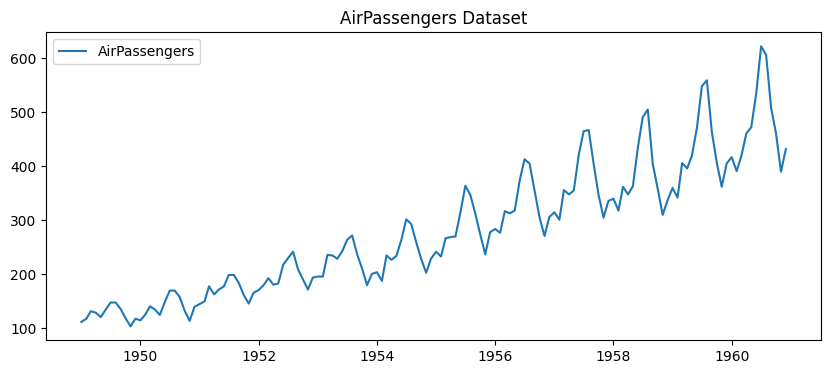

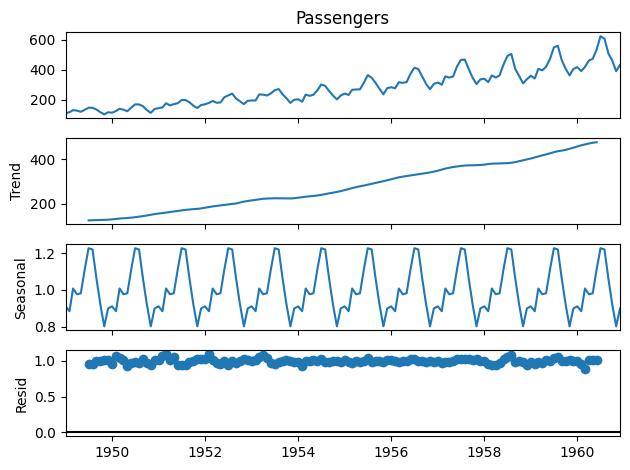

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(data, label="AirPassengers")
plt.title("AirPassengers Dataset")
plt.legend()
plt.show()

# Decompose
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()


## Question 7: Apply Isolation Forest on a numerical dataset (NYC Taxi Fare sample) to detect anomalies. Visualize the anomalies on a 2D scatter plot.


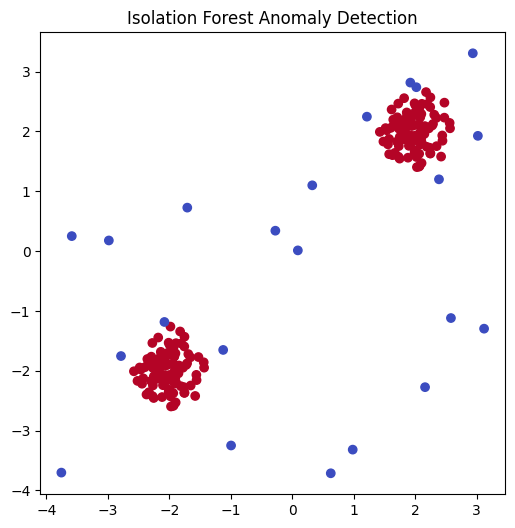

In [2]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Synthetic dataset (simulate Taxi Fare)
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X, X_outliers]

# Apply Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
y_pred = clf.fit_predict(X)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="coolwarm", marker="o")
plt.title("Isolation Forest Anomaly Detection")
plt.show()


## Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


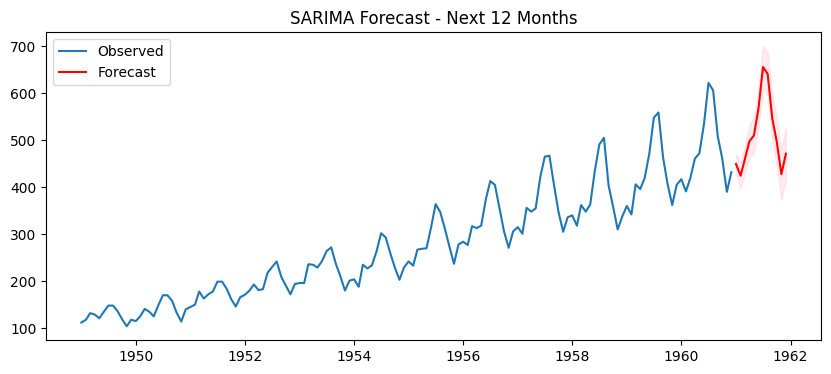

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(10,4))
plt.plot(data, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast", color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast - Next 12 Months")
plt.legend()
plt.show()


## Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.


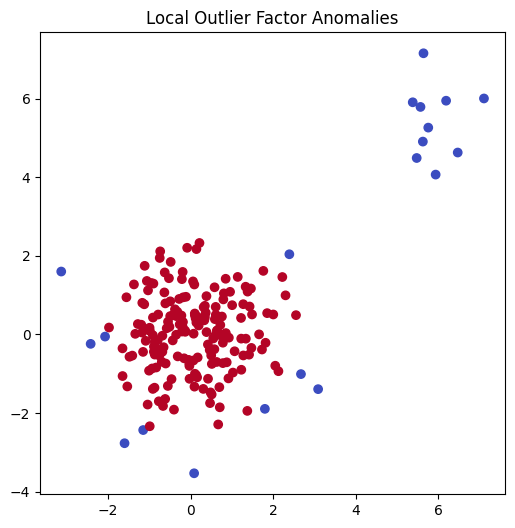

In [4]:
from sklearn.neighbors import LocalOutlierFactor

# Synthetic dataset
X = np.random.randn(200, 2)
X[10:20] = X[10:20] + 6  # inject anomalies

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="coolwarm", marker="o")
plt.title("Local Outlier Factor Anomalies")
plt.show()



## Question 10:  

You are working as a data scientist for a power grid monitoring company.  
Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes.  
The dataset includes features like **timestamp, region, weather conditions, and energy usage**.  

**Explain your real-time data science workflow:**  

- How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?  
- Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?  
- How would you validate and monitor the performance over time?  
- How would this solution help business decisions or operations?  



**Answer:**  



### 1. Anomaly Detection in Streaming Data
- **Model choice:** Isolation Forest is scalable and efficient for real-time. LOF works for local density differences; DBSCAN is less suited for continuous streaming.  
- **Approach:** Use rolling windows (2–3 hours of 15-min data), extract features (change, % change), apply Isolation Forest/LOF to flag spikes/drops.  

### 2. Short-Term Forecasting
- **Best model:** SARIMAX (Seasonal ARIMA with exogenous variables) because it can use external features like weather and region.  
- **Reason:** Handles trend, seasonality, and external effects. Alternative: deep learning (LSTM/GRU).  

### 3. Validation and Monitoring
- Use walk-forward validation, track RMSE/MAE/MAPE.  
- Real-time monitoring dashboard: compare forecast vs actual, track anomaly alerts, retrain periodically.  

### 4. Business Impact
- **Operational:** Detect faults early, prevent blackouts, balance load.  
- **Strategic:** Better infrastructure planning, renewable integration, improved reliability and customer satisfaction.  


/tmp/ipython-input-3465296651.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range(start="2021-01-01", periods=100, freq="15T")


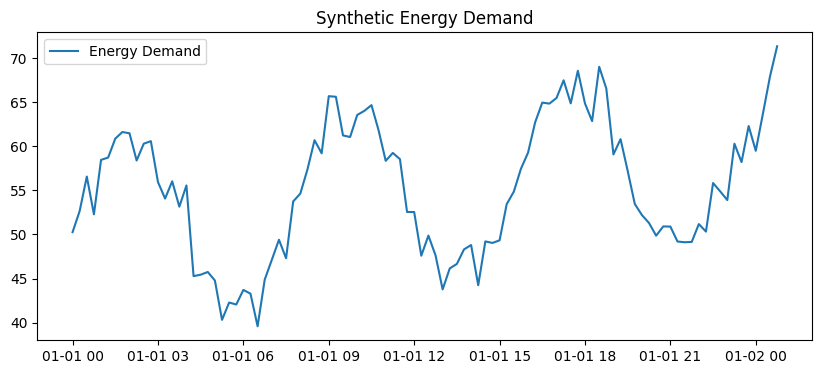

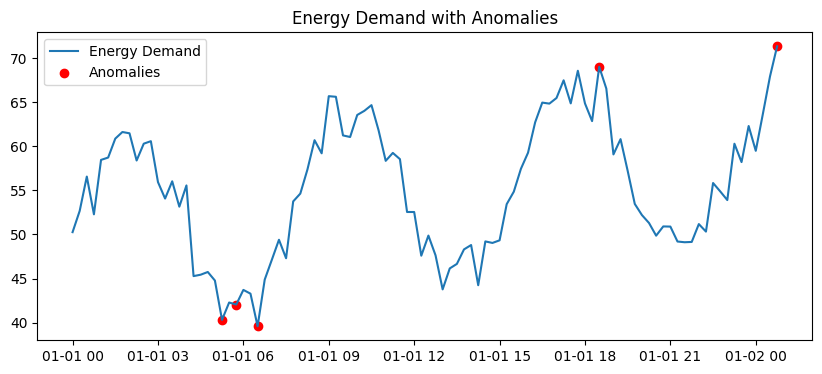

In [8]:
# Synthetic example for energy demand
time = pd.date_range(start="2021-01-01", periods=100, freq="15T")
demand = 50 + 0.1*np.arange(100) + np.sin(np.linspace(0,20,100))*10 + np.random.randn(100)*2

# Plot demand
plt.figure(figsize=(10,4))
plt.plot(time, demand, label="Energy Demand")
plt.title("Synthetic Energy Demand")
plt.legend()
plt.show()

# Apply Isolation Forest for anomalies
X = demand.reshape(-1,1)
clf = IsolationForest(contamination=0.05, random_state=42)
y_pred = clf.fit_predict(X)

plt.figure(figsize=(10,4))
plt.plot(time, demand, label="Energy Demand")
plt.scatter(time[y_pred==-1], demand[y_pred==-1], color="red", label="Anomalies")
plt.title("Energy Demand with Anomalies")
plt.legend()
plt.show()